# Mengamati statistik warna pada sebuah citra

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Hitung statistik warna dengan membuat fungsi mean, variance, skewness, dan kurtosis sendiri

In [ ]:
import math
# Fungsi untuk menghitung Mean
def calc_mean(data):
    M, N = len(data), len(data[0])
    total_sum = sum(sum(row) for row in data)
    mean_value = total_sum / (M * N)
    return mean_value

# Fungsi untuk menghitung Varians
def calc_variance(data, mean):
    M, N = len(data), len(data[0])
    variance_sum = sum(sum((pixel - mean) ** 2 for pixel in row) for row in data)
    variance_value = variance_sum / (M * N)
    return variance_value  # Mengembalikan varians, bukan standar deviasi

# Fungsi untuk menghitung Skewness
def calc_skewness(data, mean, variance):
    M, N = len(data), len(data[0])
    std_dev = math.sqrt(variance)  # Menghitung standar deviasi dari varians
    skewness_sum = sum(sum((pixel - mean) ** 3 for pixel in row) for row in data)
    skewness_value = skewness_sum / (M * N * std_dev ** 3)
    return skewness_value

# Fungsi untuk menghitung Kurtosis
def calc_kurtosis(data, mean, variance):
    M, N = len(data), len(data[0])
    std_dev = math.sqrt(variance)  # Menghitung standar deviasi dari varians
    kurtosis_sum = sum(sum((pixel - mean) ** 4 for pixel in row) for row in data)
    kurtosis_value = kurtosis_sum / (M * N * std_dev ** 4) - 3
    return kurtosis_value

In [ ]:
import cv2
import numpy as np
from scipy.stats import skew, kurtosis
import pandas as pd

# Memuat citra
image_path = '/content/drive/MyDrive/Citra/citra warna.jpeg'
image = cv2.imread(image_path)

# Konversi citra dari BGR ke RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Memisahkan komponen warna R, G, B
R, G, B = image_rgb[:,:,0], image_rgb[:,:,1], image_rgb[:,:,2]

# Fungsi untuk menghitung statistik
def calculate_statistics(channel):
    mean = calc_mean(channel)
    variance = calc_variance(channel, mean)
    skewness = calc_skewness(channel, mean, variance)
    kurt = calc_kurtosis(channel, mean, variance)
    std_dev = math.sqrt(variance)  # Menghitung standar deviasi dari varians
    return mean, std_dev, skewness, kurt

# Menghitung statistik untuk masing-masing komponen warna
r_mean, r_std, r_skew, r_kurt = calculate_statistics(R)
g_mean, g_std, g_skew, g_kurt = calculate_statistics(G)
b_mean, b_std, b_skew, b_kurt = calculate_statistics(B)

# Menyimpan hasil dalam bentuk DataFrame untuk kemudahan presentasi
df = pd.DataFrame({
    "Channel": ["Red", "Green", "Blue"],
    "Mean": [r_mean, g_mean, b_mean],
    "Standard Deviation": [r_std, g_std, b_std],
    "Skewness": [r_skew, g_skew, b_skew],
    "Kurtosis": [r_kurt, g_kurt, b_kurt]
})

print("Statistik Warna pada Citra:")
print(df)

Statistik Warna pada Citra:
  Channel        Mean  Standard Deviation  Skewness  Kurtosis
0     Red  137.291487           74.598257  0.266684 -1.394291
1   Green  109.475296           61.964420  0.553498 -0.945196
2    Blue  137.318038           63.711118  0.010920 -1.117479


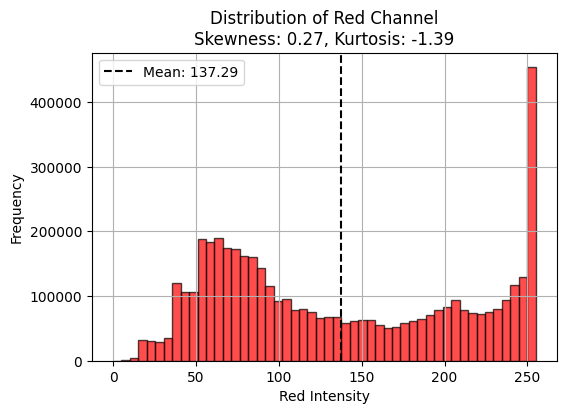

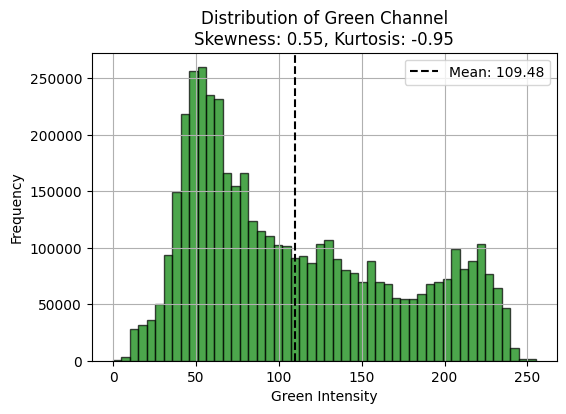

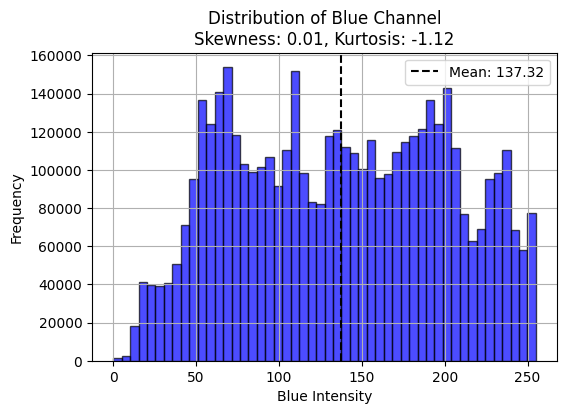

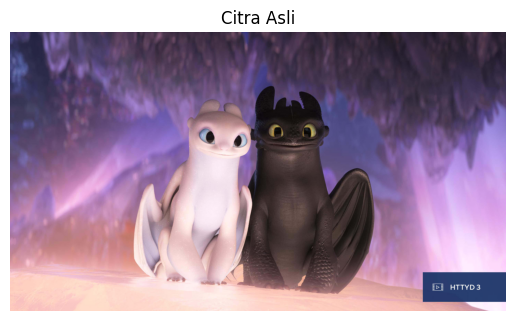

In [ ]:
# Fungsi untuk menampilkan kurva distribusi
def plot_distribution(data, color, mean, skewness, kurtosis, channel_name):
    plt.figure(figsize=(6, 4))
    plt.hist(data.ravel(), bins=50, color=color, alpha=0.7, edgecolor='black')

    # Garis vertikal untuk mean
    plt.axvline(mean, color='k', linestyle='dashed', linewidth=1.5, label=f'Mean: {mean:.2f}')

    # Menambahkan teks informasi statistik
    plt.title(f'Distribution of {channel_name} Channel\nSkewness: {skewness:.2f}, Kurtosis: {kurtosis:.2f}')
    plt.xlabel(f'{channel_name} Intensity')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True)
    plt.show()

# Menampilkan distribusi masing-masing channel
plot_distribution(R, 'red', r_mean, r_skew, r_kurt, 'Red')
plot_distribution(G, 'green', g_mean, g_skew, g_kurt, 'Green')
plot_distribution(B, 'blue', b_mean, b_skew, b_kurt, 'Blue')

# Menampilkan citra asli
plt.imshow(image_rgb)
plt.title('Citra Asli')
plt.axis('off')
plt.show()

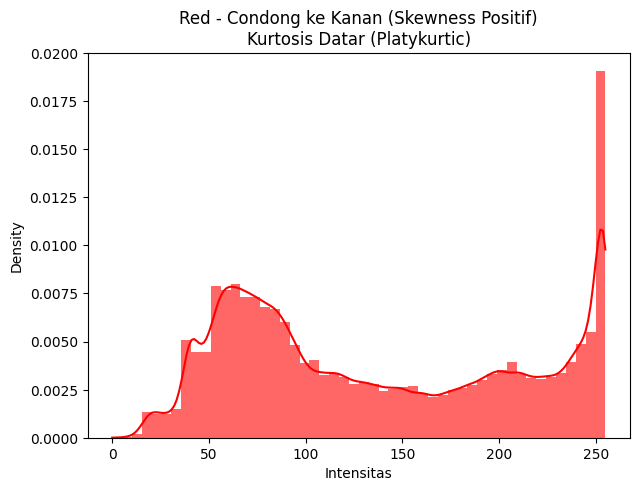

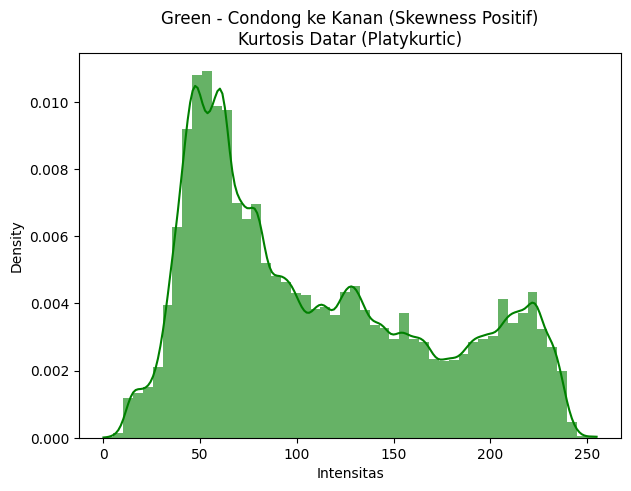

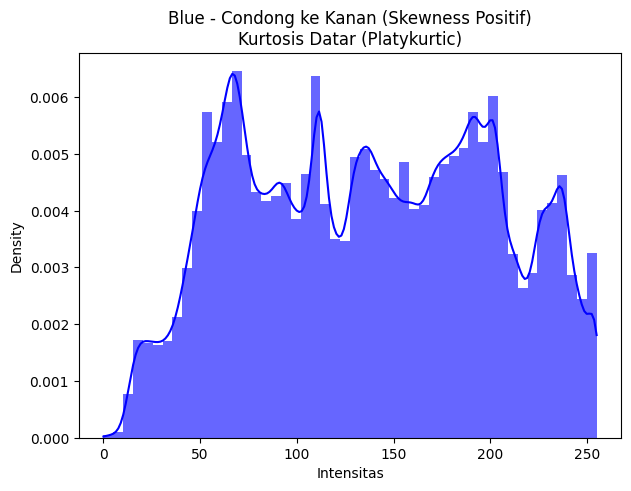

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Fungsi untuk menampilkan histogram dengan kurva KDE dan label berdasarkan skewness dan kurtosis
def plot_histogram_with_kde(data, color, channel_name, skewness, kurtosis):
    plt.figure(figsize=(7, 5))

    # Plot histogram dengan kurva KDE
    sns.histplot(data.flatten(), bins=50, color=color, kde=True, stat="density", edgecolor="none", alpha=0.6)

    # Tentukan deskripsi untuk skewness
    if skewness < 0:
        skew_description = "Condong ke Kiri (Skewness Negatif)"
    elif skewness > 0:
        skew_description = "Condong ke Kanan (Skewness Positif)"
    else:
        skew_description = "Simetris (Skewness Nol)"

    # Tentukan deskripsi untuk kurtosis
    if kurtosis < 0:
        kurt_description = "Kurtosis Datar (Platykurtic)"
    elif kurtosis > 0:
        kurt_description = "Kurtosis Lancip (Leptokurtic)"
    else:
        kurt_description = "Kurtosis Sedang (Mesokurtic)"

    # Tambahkan judul dengan deskripsi lengkap
    plt.title(f"{channel_name} - {skew_description}\n{kurt_description}")
    plt.xlabel("Intensitas")
    plt.ylabel("Density")
    plt.show()

# Panggil fungsi untuk setiap kanal warna (R, G, B)
plot_histogram_with_kde(R, 'red', 'Red', r_skew, r_kurt)
plot_histogram_with_kde(G, 'green', 'Green', g_skew, g_kurt)
plot_histogram_with_kde(B, 'blue', 'Blue', b_skew, b_kurt)

## Hitung statistik warna dengan menggunakan library np

In [ ]:
import cv2
import numpy as np
from scipy.stats import skew, kurtosis
import pandas as pd

# Memuat citra
image_path = '/content/drive/MyDrive/Citra/citra warna.jpeg'
image = cv2.imread(image_path)

# Konversi citra dari BGR ke RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Memisahkan komponen warna R, G, B
R, G, B = image_rgb[:,:,0], image_rgb[:,:,1], image_rgb[:,:,2]

# Fungsi untuk menghitung statistik
def calculate_statistics(channel):
    mean = np.mean(channel)
    std_dev = np.std(channel)
    skewness = skew(channel.flatten())
    kurt = kurtosis(channel.flatten())
    return mean, std_dev, skewness, kurt

# Menghitung statistik untuk masing-masing komponen warna
r_mean, r_std, r_skew, r_kurt = calculate_statistics(R)
g_mean, g_std, g_skew, g_kurt = calculate_statistics(G)
b_mean, b_std, b_skew, b_kurt = calculate_statistics(B)

# Menyimpan hasil dalam bentuk DataFrame untuk kemudahan presentasi
df = pd.DataFrame({
    "Channel": ["Red", "Green", "Blue"],
    "Mean": [r_mean, g_mean, b_mean],
    "Standard Deviation": [r_std, g_std, b_std],
    "Skewness": [r_skew, g_skew, b_skew],
    "Kurtosis": [r_kurt, g_kurt, b_kurt]
})

print("Statistik Warna pada Citra:")
print(df)

Statistik Warna pada Citra:
  Channel        Mean  Standard Deviation  Skewness  Kurtosis
0     Red  137.291487           74.598257  0.266684 -1.394291
1   Green  109.475296           61.964420  0.553498 -0.945196
2    Blue  137.318038           63.711118  0.010920 -1.117479


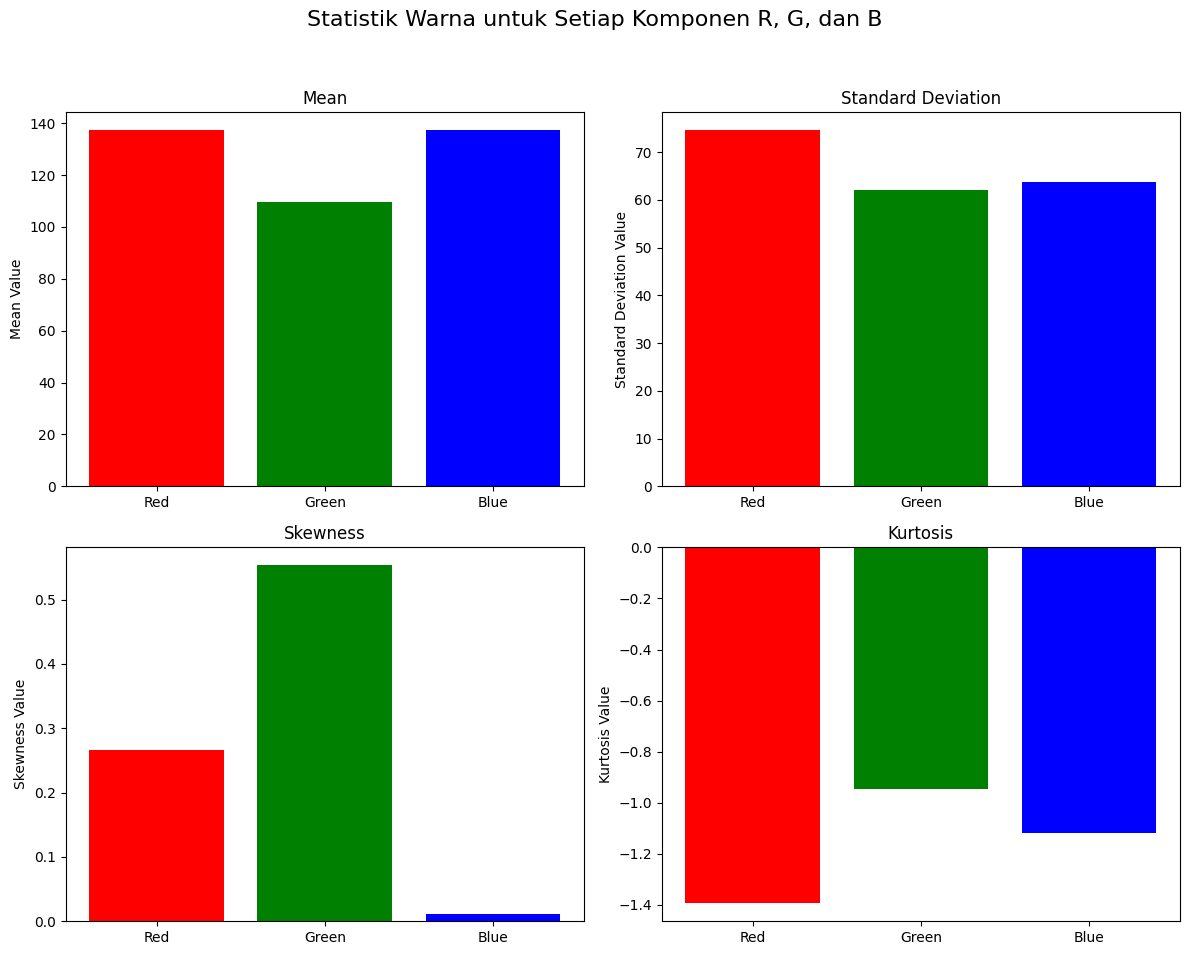

In [ ]:
import matplotlib.pyplot as plt

# Membuat visualisasi statistik untuk masing-masing komponen RGB
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Statistik Warna untuk Setiap Komponen R, G, dan B', fontsize=16)

# Menampilkan grafik Mean
axes[0, 0].bar(df['Channel'], df['Mean'], color=['red', 'green', 'blue'])
axes[0, 0].set_title('Mean')
axes[0, 0].set_ylabel('Mean Value')

# Menampilkan grafik Standard Deviation
axes[0, 1].bar(df['Channel'], df['Standard Deviation'], color=['red', 'green', 'blue'])
axes[0, 1].set_title('Standard Deviation')
axes[0, 1].set_ylabel('Standard Deviation Value')

# Menampilkan grafik Skewness
axes[1, 0].bar(df['Channel'], df['Skewness'], color=['red', 'green', 'blue'])
axes[1, 0].set_title('Skewness')
axes[1, 0].set_ylabel('Skewness Value')

# Menampilkan grafik Kurtosis
axes[1, 1].bar(df['Channel'], df['Kurtosis'], color=['red', 'green', 'blue'])
axes[1, 1].set_title('Kurtosis')
axes[1, 1].set_ylabel('Kurtosis Value')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

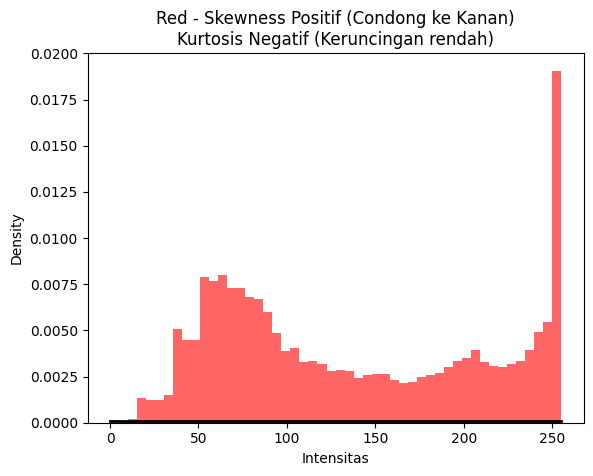

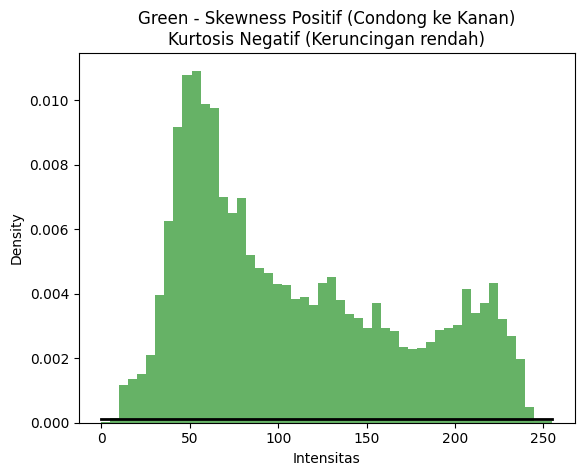

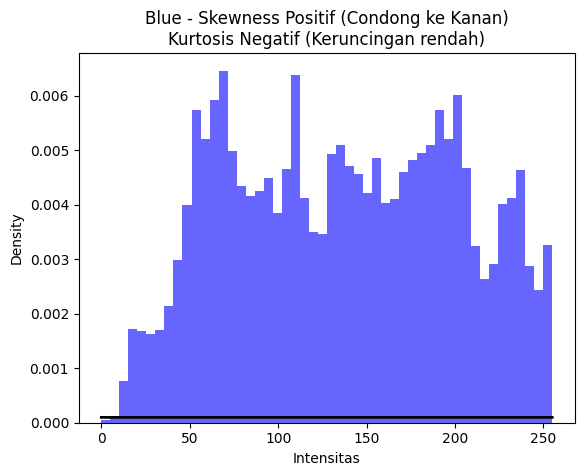

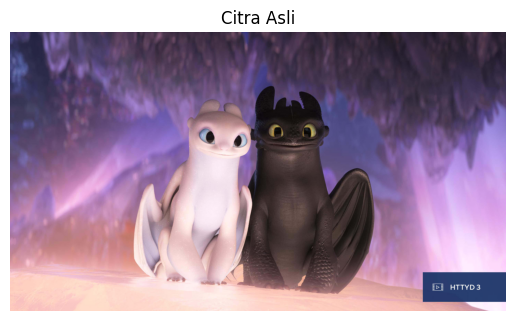

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, norm

# Memuat citra
image_path = '/content/drive/MyDrive/Citra/citra warna.jpeg'
image = cv2.imread(image_path)

# Konversi citra dari BGR ke RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Memisahkan komponen warna R, G, B
R, G, B = image_rgb[:,:,0], image_rgb[:,:,1], image_rgb[:,:,2]

# Fungsi untuk menghitung statistik dan plot distribusi skewness
def plot_skewness_kurtosis(channel, color_name, color):
    mean = calc_mean(channel)
    std_dev = calc_variance(channel, mean)
    skewness = calc_skewness(channel, mean, std_dev)
    kurt = calc_kurtosis(channel, mean, std_dev)

    # Membuat plot histogram
    plt.hist(channel.flatten(), bins=50, color=color, alpha=0.6, density=True)

    # Kurva distribusi normal
    x = np.linspace(channel.min(), channel.max(), 100)
    p = norm.pdf(x, mean, std_dev)
    plt.plot(x, p, 'k', linewidth=2)

    # Menentukan jenis skewness
    if skewness < 0:
        skew_text = 'Skewness Negatif (Condong ke Kiri)'
    elif skewness > 0:
        skew_text = 'Skewness Positif (Condong ke Kanan)'
    else:
        skew_text = 'Skewness Nol (Simetris)'

    # Menentukan jenis kurtosis
    if kurt < 0:
        kurt_text = 'Kurtosis Negatif (Keruncingan rendah)'
    elif kurt > 0:
        kurt_text = 'Kurtosis Positif (Keruncingan tinggi)'
    else:
        kurt_text = 'Kurtosis Nol (Keruncingan normal)'

    # Mengatur teks deskripsi
    plt.title(f'{color_name} - {skew_text}\n{kurt_text}')
    plt.xlabel('Intensitas')
    plt.ylabel('Density')
    plt.show()

# Menampilkan grafik untuk masing-masing komponen warna
plot_skewness_kurtosis(R, 'Red', 'red')
plot_skewness_kurtosis(G, 'Green', 'green')
plot_skewness_kurtosis(B, 'Blue', 'blue')

# Menampilkan citra asli
plt.imshow(image_rgb)
plt.title('Citra Asli')
plt.axis('off')
plt.show()